## Fiedler Vector Experiment
1. load graph
2. compute Laplacian Matrix, and find eigenvalue of laplacian
3. FV: second smallest eigenvalue
4. Now reorder graph based on FiedlerVector
5. convert Adjacancy matrix to numpy array
6. reorder AM based on FV ordering
7. plot AM

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

/lustre/acslab/users/3281/miniconda3/envs/pytorchsaeideh/lib/python3.10/site-packages/scipy/sparse/_base.py:719: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.13.0. Use `.toarray()` instead.
  warn(np.VisibleDeprecationWarning(


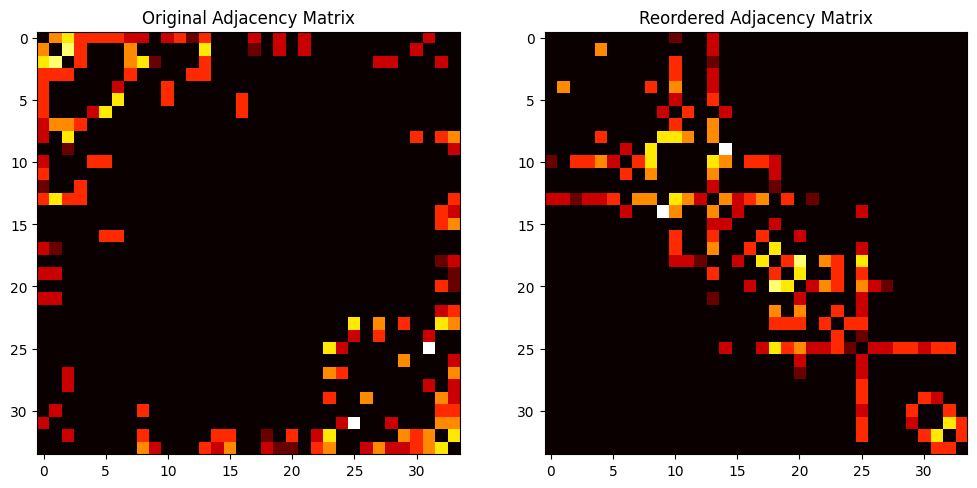

In [4]:
G = nx.karate_club_graph()

L = nx.laplacian_matrix(G).toarray()
eigenvalues, eigenvectors = np.linalg.eigh(L)
fiedler_vector = eigenvectors[:, 1]

node_order = np.argsort(fiedler_vector)

adj_matrix = nx.adjacency_matrix(G).A  # Using .A for compatibility

reordered_adj_matrix = adj_matrix[node_order][:, node_order]

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("Original Adjacency Matrix")
plt.imshow(adj_matrix, cmap='hot', interpolation='nearest')

plt.subplot(122)
plt.title("Reordered Adjacency Matrix")
plt.imshow(reordered_adj_matrix, cmap='hot', interpolation='nearest')

plt.show()


## Move on into Agatha

## Fiedlervector 
Note : FV in scipy is not the same as fiedler vector algorithm.

In [1]:
import scipy

In [2]:
exp_csr = scipy.sparse.load_npz("/lustre/acslab/users/3281/NSFinalProject/aapp_aapp_edgelist.npz")

In [12]:
from scipy.linalg import det, inv, fiedler

In [11]:
sub_graph= exp_csr[:10000,:10000]

In [5]:
sub_graph[4]

<1x10000 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [30]:
import scipy.sparse
import scipy.sparse.linalg
import networkx as nx
import numpy as np

exp_csr = scipy.sparse.load_npz("/lustre/acslab/users/3281/NSFinalProject/aapp_aapp_edgelist.npz")
sub_graph= exp_csr[:10000,:10000]
subgraph_int = sub_graph.astype('float64')
# csr_matrix = nx.to_scipy_sparse_array(sub_graph, format='csr', dtype=np.int64)
#Compute the Laplacian matrix (sparse)
# laplacian = scipy.sparse.csgraph.laplacian(your_sub_graph_matrix)
laplacian = scipy.sparse.csgraph.laplacian(subgraph_int, normed=False)


# Compute the Fiedler vector
eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(laplacian, k=2, which='SM')
fiedler_vector = eigenvectors[:, 1]


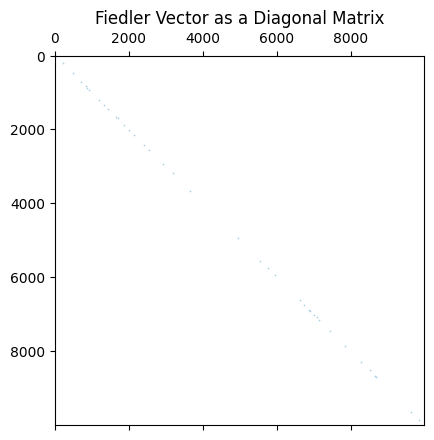

In [1]:
import numpy as np
import scipy.sparse
import scipy.linalg
import matplotlib.pyplot as plt

# Load the sparse matrix (assuming it represents an adjacency matrix of a graph)
exp_csr = scipy.sparse.load_npz("/lustre/acslab/users/3281/NSFinalProject/aapp_aapp_edgelist.npz")
sub_graph= exp_csr[:10000,:10000]
# Compute the degree matrix
degrees = np.sum(sub_graph, axis=1).A.flatten()  # Convert to 1D array if necessary
degree_matrix = scipy.sparse.diags(degrees)

# Compute the Laplacian matrix
laplacian = degree_matrix - sub_graph

# Compute the eigenvalues and eigenvectors of the Laplacian
eig_values, eig_vectors = scipy.linalg.eig(laplacian.toarray())  # Convert to dense array

# Find the position of the second smallest eigenvalue (Fiedler value)
fiedler_pos = np.where(eig_values.real == np.sort(eig_values.real)[1])[0][0]

# Extract the corresponding eigenvector (Fiedler vector)
fiedler_vector = eig_vectors[:, fiedler_pos]

# Convert the Fiedler vector to a diagonal matrix
fiedler_diag = np.diag(fiedler_vector.real)

# Plotting the diagonal matrix
plt.spy(fiedler_diag, markersize=0.1)
plt.title("Fiedler Vector as a Diagonal Matrix")
plt.show()

In [15]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh
import math

def calculate_bits_per_link(csr_matrix, permutation):
    volumes = np.array(csr_matrix.sum(axis=1)).flatten()
    x_positions = np.zeros_like(volumes, dtype=float)
    for i, v in enumerate(volumes):
        x_positions[permutation[i]] = v / 2 + np.sum(volumes[permutation[:i]])

    bits = 0
    rows, cols = csr_matrix.nonzero()
    for i in range(len(rows)):
        weight = csr_matrix[rows[i], cols[i]].item()
        bits += weight * abs(math.log2(abs(x_positions[rows[i]] - x_positions[cols[i]]) + 1))

    return bits

def calculate_fiedler_vector(csr_matrix):
    # Convert the boolean matrix to a float matrix for Laplacian calculation
    float_matrix = csr_matrix.astype(np.float64)
    L = laplacian(float_matrix, normed=False)
    eigenvalues, eigenvectors = eigh(L.toarray(), subset_by_index=[1,1])
    fiedler_vector = eigenvectors[:, 0]
    return fiedler_vector

# Assuming exp_csr is your large sparse matrix in CSR format
# Extract the subgraph
sub_graph = exp_csr[:10000, :10000]

# Calculate the Fiedler vector
fiedler_vector = calculate_fiedler_vector(sub_graph)

# Nodes will be sorted according to Fiedler vector values
fiedler_order = np.argsort(fiedler_vector)

# Calculate bits per link before using Fiedler vector
initial_bits = calculate_bits_per_link(sub_graph, np.arange(sub_graph.shape[0]))

# Calculate bits per link after using Fiedler vector
optimized_bits = calculate_bits_per_link(sub_graph, fiedler_order)

# Print the results
print(f"Bits per link before using Fiedler vector: {initial_bits}")
print(f"Bits per link after using Fiedler vector: {optimized_bits}")


Bits per link before using Fiedler vector: 164.89982831064452
Bits per link after using Fiedler vector: 168.93625281907623
